In [77]:
import pandas as pd
pd.set_option('display.max_columns', None)
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [78]:
df = pd.read_csv("data/train.csv")
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHON1,LADULT1,COLGSEX1,NUMADULT,LANDSEX1,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX1,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,SLEPTIM1,LASTDEN4,RMVTETH4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNC1,CHCOCNC1,CHCCOPD3,ADDEPEV3,CHCKDNY2,HAVARTH4,DIABETE4,DIABAGE4,MARITAL,EDUCA,RENTHOM1,NUMHHOL4,NUMPHON4,CPDEMO1C,VETERAN3,EMPLOY1,CHILDREN,INCOME3,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,HADMAM,HOWLONG,CERVSCRN,CRVCLCNC,CRVCLPAP,CRVCLHPV,HADHYST2,HADSIGM4,COLNSIGM,COLNTES1,SIGMTES1,LASTSIG4,COLNCNCR,VIRCOLO1,VCLNTES2,SMALSTOL,STOLTEST,STOOLDN2,BLDSTFIT,SDNATES1,SMOKE100,SMOKDAY2,USENOW3,ECIGNOW2,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSC1,LCSSCNCR,LCSCTWHN,ALCDAY4,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,PNEUVAC4,TETANUS1,HIVTST7,HIVTSTD3,HIVRISK5,COVIDPOS,COVIDSMP,COVIDPRM,PDIABTS1,PREDIAB2,DIABTYPE,INSULIN1,CHKHEMO3,EYEEXAM1,DIABEYE1,DIABEDU1,FEETSORE,TOLDCFS,HAVECFS,WORKCFS,IMFVPLA3,HPVADVC4,HPVADSHT,SHINGLE2,COVIDVA1,COVIDNU1,COVIDFS1,COVIDSE1,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,CNCRDIFF,CNCRAGE,CNCRTYP2,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,PSATEST1,PSATIME1,PCPSARS2,PSASUGST,PCSTALK1,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,ACEADSAF,ACEADNED,LSATISFY,EMTSUPRT,SDHISOLT,SDHEMPLY,FOODSTMP,SDHFOOD1,SDHBILLS,SDHUTILS,SDHTRNSP,SDHSTRE1,MARIJAN1,MARJSMOK,MARJEAT,MARJVAPE,MARJDAB,MARJOTHR,USEMRJN4,LASTSMK2,STOPSMK2,MENTCIGS,MENTECIG,HEATTBCO,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,FIREARM5,GUNLOAD,LOADULK2,RCSGEND1,RCSXBRTH,RCSRLTN2,CASTHDX2,CASTHNO2,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,HADSEX,PFPPRVN4,TYPCNTR9,BRTHCNT4,WHEREGET,NOBCUSE8,BCPREFER,RRCLASS3,RRCOGNT2,RRTREAT,RRATWRK2,RRHCARE4,RRPHYSM2,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE2,_CPRACE2,CAGEG,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_HCVU652,_TOTINDA,_EXTETH3,_ALTETH3,_DENVST3,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_PRACE2,_MRACE2,_HISPANC,_RACE1,_RACEG22,_RACEGR4,_RACEPR1,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_RFMAM22,_MAM5023,_HADCOLN,_CLNSCP1,_HADSIGM,_SGMSCP1,_SGMS101,_RFBLDS5,_STOLDN1,_VIRCOL1,_SBONTI1,_CRCREC2,_SMOKER3,_RFSMOK3,_CURECI2,_YRSSMOK,_PACKDAY,_PACKYRS,_YRSQUIT,_SMOKGRP,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,ID,TARGET
0,2.0,5.0,5132022,5,13,2022,1100.0,2022000436,2.022000e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,30.0,88.0,88.0,3.0,1.0,2.0,1.0,1.0,7.0,1.0,8.0,2.0,2.0,NaN,2.0,1.0,2.0,2.0,1.0,1.0,3.0,NaN,3.0,5.0,1.0,1.0,2.0,1.0,2.0,7.0,88.0,77.0,NaN,165.0,502.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN,1.0,1.0,1.0,2.0,NaN,NaN,1.0,1.0,3.0,1.0,2.0,2.0,NaN,NaN,1.0,3.0,3.0,1.0,13.0,35.0,40.0,1.0,2.0,NaN,208.0,1.0,88.0,2.0,1.0,102021.0,1.0,3.0,2.0,NaN,2.0,1.0,2.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,5.0,2.0,2.0,5.0,2.0,2.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,1.0,1.0,1.0,21011.0,5.828556,0.5,2.914278,1.0,NaN,NaN,NaN,NaN,NaN,1.0,0.331355,13.852858,15.378801,1.0,3.0,1.0,1.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225000 entries, 0 to 224999
Columns: 325 entries, _STATE to TARGET
dtypes: bool(1), float64(318), int64(6)
memory usage: 556.4 MB


# Valeurs manquantes

In [80]:
print(df.describe())  # Pour les variables numériques

              _STATE         FMONTH         IDATE         IMONTH  \
count  225000.000000  225000.000000  2.250000e+05  225000.000000   
mean       21.617533       6.743333  6.846816e+06       6.690351   
std        10.780828       3.526184  3.533200e+06       3.527551   
min         1.000000       1.000000  1.012023e+06       1.000000   
25%        12.000000       4.000000  4.022022e+06       4.000000   
50%        23.000000       7.000000  7.112022e+06       7.000000   
75%        30.000000      10.000000  1.011202e+07      10.000000   
max        39.000000      12.000000  1.231202e+07      12.000000   

                IDAY          IYEAR       DISPCODE         SEQNO  \
count  225000.000000  225000.000000  225000.000000  2.250000e+05   
mean       15.444276    2022.050720    1121.452000  2.022005e+09   
std         8.526226       0.219426      41.048985  3.819732e+03   
min         0.000000    2022.000000    1100.000000  2.022000e+09   
25%         8.000000    2022.000000    1100.000

In [81]:
print(df.isnull().sum())
print(df.isnull().sum() / len(df) * 100)  # En pourcentage

_STATE           0
FMONTH           0
IDATE            0
IMONTH           0
IDAY             0
IYEAR            0
DISPCODE         0
SEQNO            0
_PSU             0
CTELENM1    176706
PVTRESD1    176707
COLGHOUS    224987
STATERE1    176706
CELPHON1    176706
LADULT1     176706
COLGSEX1    224986
NUMADULT    176718
LANDSEX1    202651
NUMMEN      200486
NUMWOMEN    200483
RESPSLCT    199118
SAFETIME     48294
CTELNUM1     48294
CELLFON5     48295
CADULT1      48294
CELLSEX1     48294
PVTRESD3     48299
CCLGHOUS    224262
CSTATE1      48299
LANDLINE     48299
HHADULT      48299
SEXVAR           0
GENHLTH          1
PHYSHLTH         4
MENTHLTH         2
POORHLTH     96358
PRIMINSR         3
PERSDOC3         1
MEDCOST1         3
CHECKUP1         2
EXERANY2         1
SLEPTIM1         1
LASTDEN4      1014
RMVTETH4      1014
CVDSTRK3         1
ASTHMA3          1
ASTHNOW     191877
CHCSCNC1         1
CHCOCNC1         1
CHCCOPD3         1
ADDEPEV3         5
CHCKDNY2         1
HAVARTH4    

In [82]:
"""
pourcentage_manquant = (df.isnull().sum()/len(df)*100)

keep_columns = pourcentage_manquant[pourcentage_manquant < 50].index.to_list()
remove_columns = pourcentage_manquant[pourcentage_manquant >= 50].index.to_list()

print(f"Colonnes à supprimer :{remove_columns}")

df_clean1 = df[keep_columns].copy()
"""

'\npourcentage_manquant = (df.isnull().sum()/len(df)*100)\n\nkeep_columns = pourcentage_manquant[pourcentage_manquant < 50].index.to_list()\nremove_columns = pourcentage_manquant[pourcentage_manquant >= 50].index.to_list()\n\nprint(f"Colonnes à supprimer :{remove_columns}")\n\ndf_clean1 = df[keep_columns].copy()\n'

In [83]:
"""

df_clean1["TARGET"].describe()
"""

'\n\ndf_clean1["TARGET"].describe()\n'

In [84]:
"""

df_clean1["TARGET"].head()

"""

'\n\ndf_clean1["TARGET"].head()\n\n'

# Observations

In [85]:
pd.set_option('display.max_rows', None)      # pour ne pas couper les lignes
pd.set_option('display.max_columns', None)   # pour ne pas couper les colonnes
df.dtypes


_STATE      float64
FMONTH      float64
IDATE         int64
IMONTH        int64
IDAY          int64
IYEAR         int64
DISPCODE    float64
SEQNO         int64
_PSU        float64
CTELENM1    float64
PVTRESD1    float64
COLGHOUS    float64
STATERE1    float64
CELPHON1    float64
LADULT1     float64
COLGSEX1    float64
NUMADULT    float64
LANDSEX1    float64
NUMMEN      float64
NUMWOMEN    float64
RESPSLCT    float64
SAFETIME    float64
CTELNUM1    float64
CELLFON5    float64
CADULT1     float64
CELLSEX1    float64
PVTRESD3    float64
CCLGHOUS    float64
CSTATE1     float64
LANDLINE    float64
HHADULT     float64
SEXVAR      float64
GENHLTH     float64
PHYSHLTH    float64
MENTHLTH    float64
POORHLTH    float64
PRIMINSR    float64
PERSDOC3    float64
MEDCOST1    float64
CHECKUP1    float64
EXERANY2    float64
SLEPTIM1    float64
LASTDEN4    float64
RMVTETH4    float64
CVDSTRK3    float64
ASTHMA3     float64
ASTHNOW     float64
CHCSCNC1    float64
CHCOCNC1    float64
CHCCOPD3    float64


In [86]:
df.shape

(225000, 325)

In [87]:
colonnes_float = df.select_dtypes(include=["float64"]).columns.tolist()
colonnes_int = df.select_dtypes(include = ["int64"]).columns.tolist()
target = "TARGET"

In [88]:
print(colonnes_int)

['IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'SEQNO', 'ID']


# Corrélations


Corrélations significatives avec TARGET (|corr| > 0.1):
_AGE80      0.231371
_AGEG5YR    0.222521
GENHLTH     0.222041
_AGE_G      0.214506
COLGSEX1    0.206725
EMPLOY1     0.203364
_HCVU652    0.194126
_AGE65YR    0.184403
_PACKYRS    0.168462
_YRSSMOK    0.161509
_RFHLTH     0.152469
_PACKDAY    0.121894
CRVCLCNC    0.105677
CHILDREN    0.105020
QSTVER     -0.101399
_SMOKGRP   -0.115289
HAVARTH4   -0.126937
DIFFWALK   -0.129064
RMVTETH4   -0.129525
RESPSLCT   -0.139966
COPDBRTH   -0.146857
DIABETE4   -0.153138
_DRDXAR2   -0.169732
Name: TARGET, dtype: float64

Nombre de variables importantes : 23
Variables importantes : ['_AGE80', '_AGEG5YR', 'GENHLTH', '_AGE_G', 'COLGSEX1', 'EMPLOY1', '_HCVU652', '_AGE65YR', '_PACKYRS', '_YRSSMOK', '_RFHLTH', '_PACKDAY', 'CRVCLCNC', 'CHILDREN', 'QSTVER', '_SMOKGRP', 'HAVARTH4', 'DIFFWALK', 'RMVTETH4', 'RESPSLCT', 'COPDBRTH', 'DIABETE4', '_DRDXAR2']


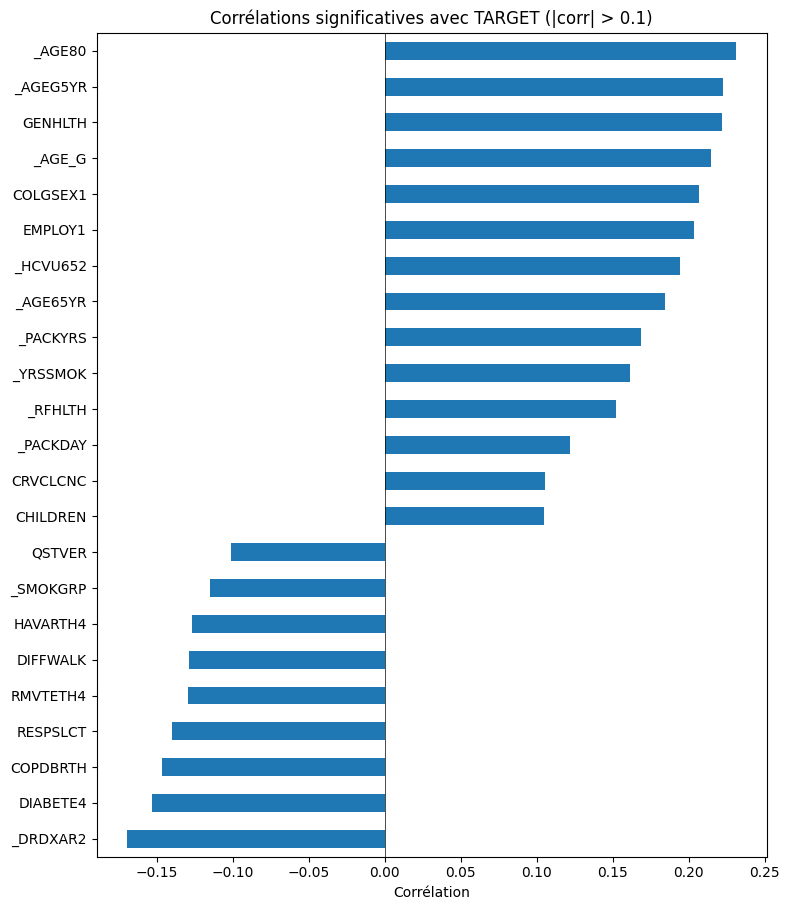

In [89]:
# 1. Calculer les corrélations avec la target
correlations = df.corr()[target].sort_values(ascending=False)

# 2. Filtrer les corrélations significatives (> 0.08 en valeur absolue)
seuil_correlation = 0.10
correlations_significatives = correlations[abs(correlations) > seuil_correlation]

# Retirer la target elle-même (corrélation = 1)
correlations_significatives = correlations_significatives.drop(target)

print(f"\nCorrélations significatives avec {target} (|corr| > {seuil_correlation}):")
print(correlations_significatives.sort_values(ascending=False))

# 3. Créer la liste des colonnes importantes
colonnes_importantes = correlations_significatives.index.tolist()
print(f"\nNombre de variables importantes : {len(colonnes_importantes)}")
print(f"Variables importantes : {colonnes_importantes}")

# 4. Visualisation des corrélations importantes
if len(colonnes_importantes) > 0:
    plt.figure(figsize=(8, max(6, len(colonnes_importantes) * 0.4)))
    correlations_significatives.sort_values().plot(kind='barh')
    plt.title(f'Corrélations significatives avec {target} (|corr| > {seuil_correlation})')
    plt.xlabel('Corrélation')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()

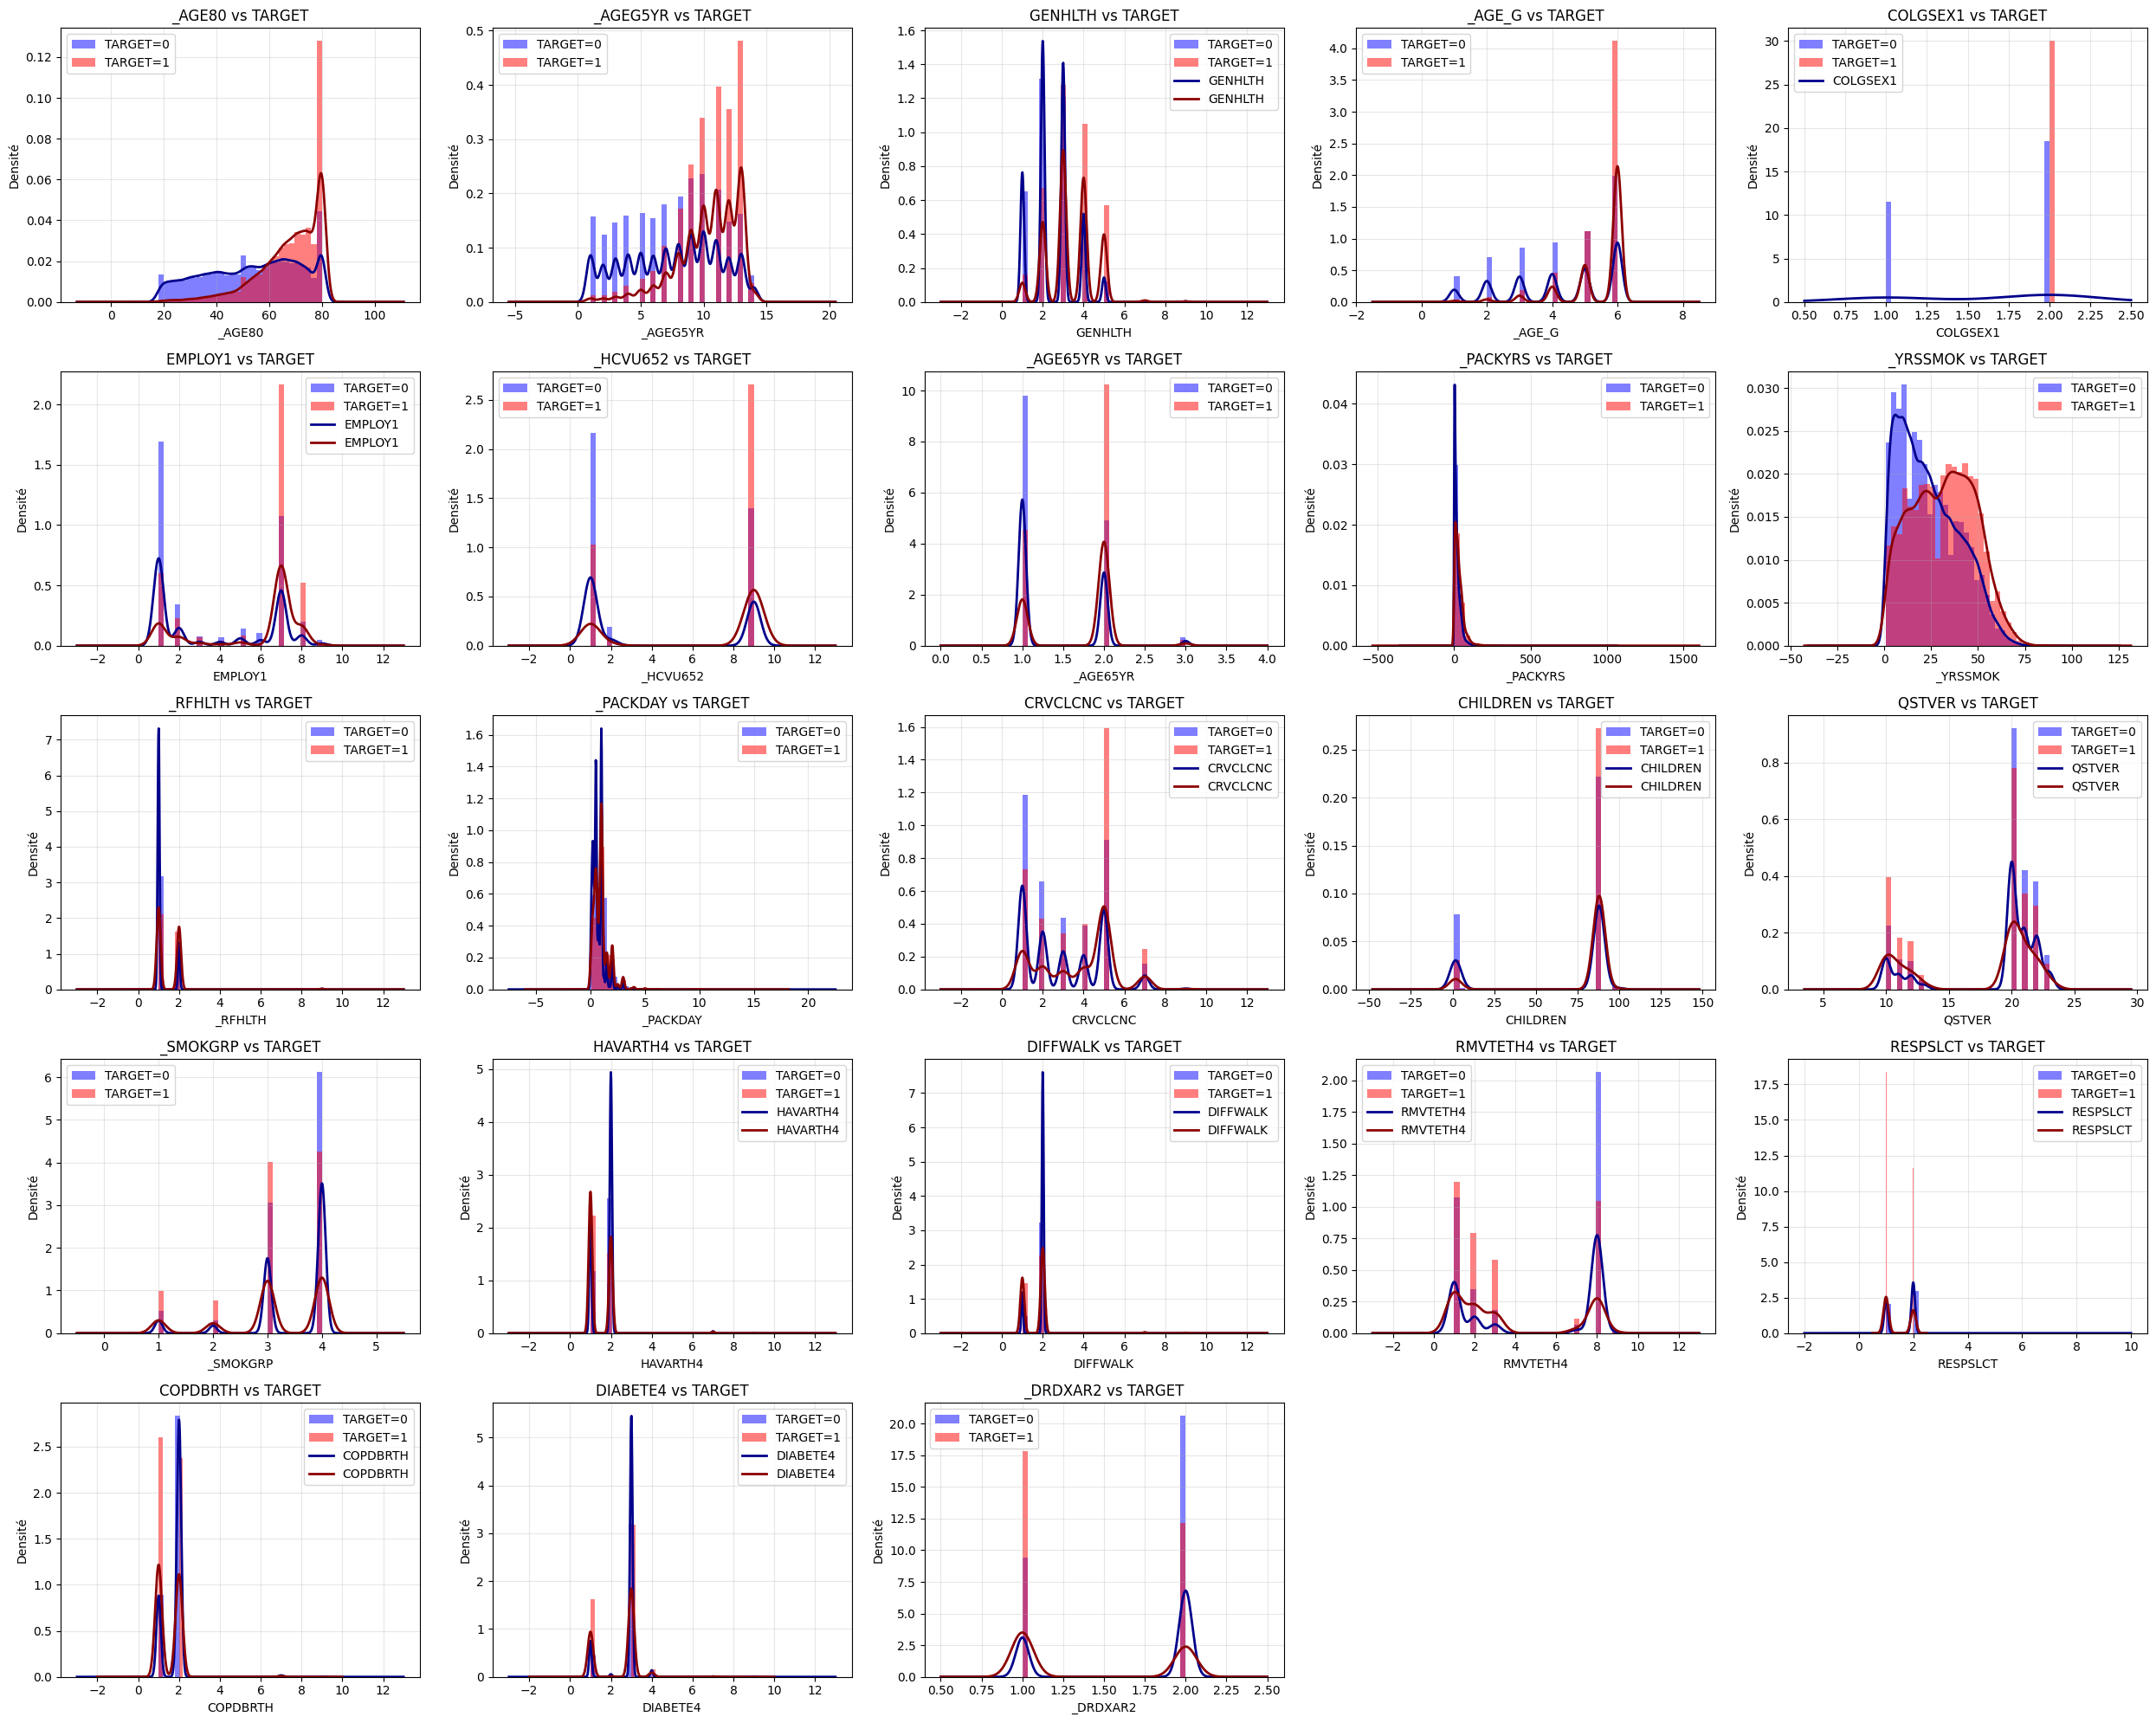

In [90]:
# Histogrammes pour les colonnes importantes
n = len(colonnes_importantes)
ncols = math.ceil(math.sqrt(n))
nrows = math.ceil(n / ncols)

plt.figure(figsize=(5 * ncols, 4 * nrows)) 

for i in range(n):
    plt.subplot(nrows, ncols, i+1)
    
    # Séparer les données par target
    data_0 = df[df[target] == 0][colonnes_importantes[i]].dropna()
    data_1 = df[df[target] == 1][colonnes_importantes[i]].dropna()
    
    # Histogrammes superposés
    plt.hist(data_0, bins=30, alpha=0.5, label=f'{target}=0', density=True, color='blue')
    plt.hist(data_1, bins=30, alpha=0.5, label=f'{target}=1', density=True, color='red')
    
    # Courbes de densité (KDE)
    if len(data_0) > 1:
        data_0.plot(kind='density', color='darkblue', linewidth=2, ax=plt.gca())
    if len(data_1) > 1:
        data_1.plot(kind='density', color='darkred', linewidth=2, ax=plt.gca())
    
    plt.title(f"{colonnes_importantes[i]} vs {target}")
    plt.xlabel(colonnes_importantes[i])
    plt.ylabel('Densité')
    plt.legend()
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Transformation des données

In [139]:
df2 = df.copy()
df2 = df2[colonnes_importantes]
df2.shape

(225000, 23)

In [140]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225000 entries, 0 to 224999
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _AGE80    225000 non-null  float64
 1   _AGEG5YR  225000 non-null  float64
 2   GENHLTH   224999 non-null  float64
 3   _AGE_G    225000 non-null  float64
 4   COLGSEX1  14 non-null      float64
 5   EMPLOY1   221762 non-null  float64
 6   _HCVU652  225000 non-null  float64
 7   _AGE65YR  225000 non-null  float64
 8   _PACKYRS  72939 non-null   float64
 9   _YRSSMOK  75329 non-null   float64
 10  _RFHLTH   225000 non-null  float64
 11  _PACKDAY  76835 non-null   float64
 12  CRVCLCNC  67541 non-null   float64
 13  CHILDREN  220150 non-null  float64
 14  QSTVER    225000 non-null  float64
 15  _SMOKGRP  206590 non-null  float64
 16  HAVARTH4  224999 non-null  float64
 17  DIFFWALK  213560 non-null  float64
 18  RMVTETH4  223986 non-null  float64
 19  RESPSLCT  25882 non-null   float64
 20  COPD

In [141]:
df2["GENHLTH_RISK"]= df2["GENHLTH"].replace({1:0, 2:1, 3:2, 4:3, 5:4})
missing_values = [7, 9, np.nan]

df2["GENHLTH_MISSING"]= df2['GENHLTH'].isin([7, 9]).astype(int)
df2.loc[df2['GENHLTH'].isna(), 'GENHLTH_MISSING'] = 1
df2.loc[df2['GENHLTH'].isin([7, 9]), 'GENHLTH_RISK'] = np.nan
df2 = df2.drop(columns=['GENHLTH'])


In [142]:
df2.head()

,_AGE80,_AGEG5YR,_AGE_G,COLGSEX1,EMPLOY1,_HCVU652,_AGE65YR,_PACKYRS,_YRSSMOK,_RFHLTH,_PACKDAY,CRVCLCNC,CHILDREN,QSTVER,_SMOKGRP,HAVARTH4,DIFFWALK,RMVTETH4,RESPSLCT,COPDBRTH,DIABETE4,_DRDXAR2,GENHLTH_RISK,GENHLTH_MISSING
0,80.0,13.0,6.0,NaN,7.0,9.0,2.0,44.0,22.0,1.0,2.00,NaN,88.0,10.0,3.0,1.0,2.0,8.0,NaN,NaN,3.0,1.0,2.0,0
1,34.0,3.0,2.0,NaN,5.0,1.0,1.0,NaN,NaN,1.0,NaN,5.0,2.0,22.0,4.0,2.0,2.0,1.0,NaN,NaN,3.0,2.0,2.0,0
2,43.0,5.0,3.0,NaN,1.0,1.0,1.0,7.0,9.0,1.0,0.75,NaN,2.0,12.0,3.0,2.0,2.0,1.0,1.0,NaN,3.0,2.0,1.0,0
3,56.0,8.0,5.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,88.0,22.0,4.0,2.0,2.0,8.0,NaN,NaN,3.0,2.0,2.0,0
4,22.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,88.0,20.0,4.0,2.0,2.0,8.0,NaN,NaN,3.0,2.0,2.0,0


## Traitement de l'age

In [143]:
# Conserver l'échelle ordinale de 1 à 13
df2['_AGEG5YR_ORD'] = df2['_AGEG5YR'].replace({14: np.nan}) 

# Créer une variable binaire pour l'information manquante
df2['AGE_MISSING'] = df2['_AGEG5YR'].apply(lambda x: 1 if x == 14 else 0)

# Simplifier l'âge en une variable binaire Âge 65+ (utile pour certains indicateurs)
# Basé sur _AGE65YR, où 1 = Age 18 to 64 et 2 = Age 65 or older
df2['AGE_65_PLUS'] = df2['_AGE65YR'].replace({1: 0, 2: 1, 3: np.nan}) 
df2['AGE_65_PLUS_MISSING'] = df2['_AGE65YR'].apply(lambda x: 1 if x == 3 else 0)

# Suppression des variables d'âge redondantes (pour l'instant)
df2 = df2.drop(columns=['_AGEG5YR', '_AGE80', '_AGE_G', '_AGE65YR'])


In [144]:
# Renommer la variable pour plus de clarté et laisser les BLANK en NaN
df2['PACK_YEARS'] = df2['_PACKYRS']

# Les variables _YRSSMOK et _PACKDAY sont redondantes avec PACK_YEARS 
# et leur gestion des NaN pourrait être complexe. On peut les supprimer ou les conserver
# uniquement pour une analyse contextuelle ultérieure.
df2 = df2.drop(columns=['_YRSSMOK', '_PACKDAY', '_PACKYRS'])

In [145]:
df2.head()

,COLGSEX1,EMPLOY1,_HCVU652,_RFHLTH,CRVCLCNC,CHILDREN,QSTVER,_SMOKGRP,HAVARTH4,DIFFWALK,RMVTETH4,RESPSLCT,COPDBRTH,DIABETE4,_DRDXAR2,GENHLTH_RISK,GENHLTH_MISSING,_AGEG5YR_ORD,AGE_MISSING,AGE_65_PLUS,AGE_65_PLUS_MISSING,PACK_YEARS
0,NaN,7.0,9.0,1.0,NaN,88.0,10.0,3.0,1.0,2.0,8.0,NaN,NaN,3.0,1.0,2.0,0,13.0,0,1.0,0,44.0
1,NaN,5.0,1.0,1.0,5.0,2.0,22.0,4.0,2.0,2.0,1.0,NaN,NaN,3.0,2.0,2.0,0,3.0,0,0.0,0,NaN
2,NaN,1.0,1.0,1.0,NaN,2.0,12.0,3.0,2.0,2.0,1.0,1.0,NaN,3.0,2.0,1.0,0,5.0,0,0.0,0,7.0
3,NaN,1.0,1.0,1.0,NaN,88.0,22.0,4.0,2.0,2.0,8.0,NaN,NaN,3.0,2.0,2.0,0,8.0,0,0.0,0,NaN
4,NaN,1.0,1.0,1.0,NaN,88.0,20.0,4.0,2.0,2.0,8.0,NaN,NaN,3.0,2.0,2.0,0,1.0,0,0.0,0,NaN


In [146]:
df2 = df2.drop(columns = ["_RFHLTH"])

In [147]:
df2 = df2.drop(columns = ["_DRDXAR2"])

In [148]:
df2.head()

,COLGSEX1,EMPLOY1,_HCVU652,CRVCLCNC,CHILDREN,QSTVER,_SMOKGRP,HAVARTH4,DIFFWALK,RMVTETH4,RESPSLCT,COPDBRTH,DIABETE4,GENHLTH_RISK,GENHLTH_MISSING,_AGEG5YR_ORD,AGE_MISSING,AGE_65_PLUS,AGE_65_PLUS_MISSING,PACK_YEARS
0,NaN,7.0,9.0,NaN,88.0,10.0,3.0,1.0,2.0,8.0,NaN,NaN,3.0,2.0,0,13.0,0,1.0,0,44.0
1,NaN,5.0,1.0,5.0,2.0,22.0,4.0,2.0,2.0,1.0,NaN,NaN,3.0,2.0,0,3.0,0,0.0,0,NaN
2,NaN,1.0,1.0,NaN,2.0,12.0,3.0,2.0,2.0,1.0,1.0,NaN,3.0,1.0,0,5.0,0,0.0,0,7.0
3,NaN,1.0,1.0,NaN,88.0,22.0,4.0,2.0,2.0,8.0,NaN,NaN,3.0,2.0,0,8.0,0,0.0,0,NaN
4,NaN,1.0,1.0,NaN,88.0,20.0,4.0,2.0,2.0,8.0,NaN,NaN,3.0,2.0,0,1.0,0,0.0,0,NaN


In [149]:
special_values = [7, 9, 77, 99]

In [150]:
df2['DIFFWALK_BIN'] = df2['DIFFWALK'].replace({1: 1, 2: 0})
df2['DIFFWALK_MISSING'] = df2['DIFFWALK'].isin(special_values).astype(int)
df2.loc[df2['DIFFWALK'].isna(), 'DIFFWALK_MISSING'] = 1
df2.loc[df2['DIFFWALK'].isin(special_values), 'DIFFWALK_BIN'] = np.nan
df2 = df2.drop(columns=['DIFFWALK'])
df2.head()

,COLGSEX1,EMPLOY1,_HCVU652,CRVCLCNC,CHILDREN,QSTVER,_SMOKGRP,HAVARTH4,RMVTETH4,RESPSLCT,COPDBRTH,DIABETE4,GENHLTH_RISK,GENHLTH_MISSING,_AGEG5YR_ORD,AGE_MISSING,AGE_65_PLUS,AGE_65_PLUS_MISSING,PACK_YEARS,DIFFWALK_BIN,DIFFWALK_MISSING
0,NaN,7.0,9.0,NaN,88.0,10.0,3.0,1.0,8.0,NaN,NaN,3.0,2.0,0,13.0,0,1.0,0,44.0,0.0,0
1,NaN,5.0,1.0,5.0,2.0,22.0,4.0,2.0,1.0,NaN,NaN,3.0,2.0,0,3.0,0,0.0,0,NaN,0.0,0
2,NaN,1.0,1.0,NaN,2.0,12.0,3.0,2.0,1.0,1.0,NaN,3.0,1.0,0,5.0,0,0.0,0,7.0,0.0,0
3,NaN,1.0,1.0,NaN,88.0,22.0,4.0,2.0,8.0,NaN,NaN,3.0,2.0,0,8.0,0,0.0,0,NaN,0.0,0
4,NaN,1.0,1.0,NaN,88.0,20.0,4.0,2.0,8.0,NaN,NaN,3.0,2.0,0,1.0,0,0.0,0,NaN,0.0,0


In [151]:
df2['COPDBRTH_BIN'] = df2['COPDBRTH'].replace({1: 1, 2: 0})
df2['COPDBRTH_MISSING'] = df2['COPDBRTH'].isin(special_values).astype(int)
df2.loc[df2['COPDBRTH'].isna(), 'COPDBRTH_MISSING'] = 1
df2.loc[df2['COPDBRTH'].isin(special_values), 'COPDBRTH_BIN'] = np.nan
df2 = df2.drop(columns=['COPDBRTH'])
df2.head()

,COLGSEX1,EMPLOY1,_HCVU652,CRVCLCNC,CHILDREN,QSTVER,_SMOKGRP,HAVARTH4,RMVTETH4,RESPSLCT,DIABETE4,GENHLTH_RISK,GENHLTH_MISSING,_AGEG5YR_ORD,AGE_MISSING,AGE_65_PLUS,AGE_65_PLUS_MISSING,PACK_YEARS,DIFFWALK_BIN,DIFFWALK_MISSING,COPDBRTH_BIN,COPDBRTH_MISSING
0,NaN,7.0,9.0,NaN,88.0,10.0,3.0,1.0,8.0,NaN,3.0,2.0,0,13.0,0,1.0,0,44.0,0.0,0,NaN,1
1,NaN,5.0,1.0,5.0,2.0,22.0,4.0,2.0,1.0,NaN,3.0,2.0,0,3.0,0,0.0,0,NaN,0.0,0,NaN,1
2,NaN,1.0,1.0,NaN,2.0,12.0,3.0,2.0,1.0,1.0,3.0,1.0,0,5.0,0,0.0,0,7.0,0.0,0,NaN,1
3,NaN,1.0,1.0,NaN,88.0,22.0,4.0,2.0,8.0,NaN,3.0,2.0,0,8.0,0,0.0,0,NaN,0.0,0,NaN,1
4,NaN,1.0,1.0,NaN,88.0,20.0,4.0,2.0,8.0,NaN,3.0,2.0,0,1.0,0,0.0,0,NaN,0.0,0,NaN,1


In [152]:
df2['_HCVU652_BIN'] = df2['_HCVU652'].replace({1: 1, 2: 0})
df2['_HCVU652_MISSING'] = df2['_HCVU652'].isin(special_values).astype(int)
df2.loc[df2['_HCVU652'].isna(), '_HCVU652_MISSING'] = 1
df2.loc[df2['_HCVU652'].isin(special_values), '_HCVU652_BIN'] = np.nan
df2 = df2.drop(columns=['_HCVU652'])
df2.head()

,COLGSEX1,EMPLOY1,CRVCLCNC,CHILDREN,QSTVER,_SMOKGRP,HAVARTH4,RMVTETH4,RESPSLCT,DIABETE4,GENHLTH_RISK,GENHLTH_MISSING,_AGEG5YR_ORD,AGE_MISSING,AGE_65_PLUS,AGE_65_PLUS_MISSING,PACK_YEARS,DIFFWALK_BIN,DIFFWALK_MISSING,COPDBRTH_BIN,COPDBRTH_MISSING,_HCVU652_BIN,_HCVU652_MISSING
0,NaN,7.0,NaN,88.0,10.0,3.0,1.0,8.0,NaN,3.0,2.0,0,13.0,0,1.0,0,44.0,0.0,0,NaN,1,NaN,1
1,NaN,5.0,5.0,2.0,22.0,4.0,2.0,1.0,NaN,3.0,2.0,0,3.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0
2,NaN,1.0,NaN,2.0,12.0,3.0,2.0,1.0,1.0,3.0,1.0,0,5.0,0,0.0,0,7.0,0.0,0,NaN,1,1.0,0
3,NaN,1.0,NaN,88.0,22.0,4.0,2.0,8.0,NaN,3.0,2.0,0,8.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0
4,NaN,1.0,NaN,88.0,20.0,4.0,2.0,8.0,NaN,3.0,2.0,0,1.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0


In [153]:
df2['HAVARTH4_BIN'] = df2['HAVARTH4'].replace({1: 1, 2: 0})
df2['HAVARTH4_MISSING'] = df2['HAVARTH4'].isin(special_values).astype(int)
df2.loc[df2['HAVARTH4'].isna(), 'HAVARTH4_MISSING'] = 1
df2.loc[df2['HAVARTH4'].isin(special_values), 'HAVARTH4_BIN'] = np.nan
df2 = df2.drop(columns=['HAVARTH4'])
df2.head()

,COLGSEX1,EMPLOY1,CRVCLCNC,CHILDREN,QSTVER,_SMOKGRP,RMVTETH4,RESPSLCT,DIABETE4,GENHLTH_RISK,GENHLTH_MISSING,_AGEG5YR_ORD,AGE_MISSING,AGE_65_PLUS,AGE_65_PLUS_MISSING,PACK_YEARS,DIFFWALK_BIN,DIFFWALK_MISSING,COPDBRTH_BIN,COPDBRTH_MISSING,_HCVU652_BIN,_HCVU652_MISSING,HAVARTH4_BIN,HAVARTH4_MISSING
0,NaN,7.0,NaN,88.0,10.0,3.0,8.0,NaN,3.0,2.0,0,13.0,0,1.0,0,44.0,0.0,0,NaN,1,NaN,1,1.0,0
1,NaN,5.0,5.0,2.0,22.0,4.0,1.0,NaN,3.0,2.0,0,3.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0
2,NaN,1.0,NaN,2.0,12.0,3.0,1.0,1.0,3.0,1.0,0,5.0,0,0.0,0,7.0,0.0,0,NaN,1,1.0,0,0.0,0
3,NaN,1.0,NaN,88.0,22.0,4.0,8.0,NaN,3.0,2.0,0,8.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0
4,NaN,1.0,NaN,88.0,20.0,4.0,8.0,NaN,3.0,2.0,0,1.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0


In [154]:
df2 = df2.drop(columns = ["RESPSLCT"])
df2.head()

,COLGSEX1,EMPLOY1,CRVCLCNC,CHILDREN,QSTVER,_SMOKGRP,RMVTETH4,DIABETE4,GENHLTH_RISK,GENHLTH_MISSING,_AGEG5YR_ORD,AGE_MISSING,AGE_65_PLUS,AGE_65_PLUS_MISSING,PACK_YEARS,DIFFWALK_BIN,DIFFWALK_MISSING,COPDBRTH_BIN,COPDBRTH_MISSING,_HCVU652_BIN,_HCVU652_MISSING,HAVARTH4_BIN,HAVARTH4_MISSING
0,NaN,7.0,NaN,88.0,10.0,3.0,8.0,3.0,2.0,0,13.0,0,1.0,0,44.0,0.0,0,NaN,1,NaN,1,1.0,0
1,NaN,5.0,5.0,2.0,22.0,4.0,1.0,3.0,2.0,0,3.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0
2,NaN,1.0,NaN,2.0,12.0,3.0,1.0,3.0,1.0,0,5.0,0,0.0,0,7.0,0.0,0,NaN,1,1.0,0,0.0,0
3,NaN,1.0,NaN,88.0,22.0,4.0,8.0,3.0,2.0,0,8.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0
4,NaN,1.0,NaN,88.0,20.0,4.0,8.0,3.0,2.0,0,1.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0


rmvteth4 à transformer en ordinal et ..

In [155]:
df2["RMVTETH4_RISK"]= df2["RMVTETH4"].replace({8:0})
missing_values = [7, 9, np.nan]

df2["RMVTETH4_MISSING"]= df2['RMVTETH4'].isin([7, 9]).astype(int)
df2.loc[df2['RMVTETH4'].isna(), 'RMVTETH4_MISSING'] = 1
df2.loc[df2['RMVTETH4'].isin([7, 9]), 'RMVTETH4_RISK'] = np.nan
df2 = df2.drop(columns=['RMVTETH4'])
df2.head()

,COLGSEX1,EMPLOY1,CRVCLCNC,CHILDREN,QSTVER,_SMOKGRP,DIABETE4,GENHLTH_RISK,GENHLTH_MISSING,_AGEG5YR_ORD,AGE_MISSING,AGE_65_PLUS,AGE_65_PLUS_MISSING,PACK_YEARS,DIFFWALK_BIN,DIFFWALK_MISSING,COPDBRTH_BIN,COPDBRTH_MISSING,_HCVU652_BIN,_HCVU652_MISSING,HAVARTH4_BIN,HAVARTH4_MISSING,RMVTETH4_RISK,RMVTETH4_MISSING
0,NaN,7.0,NaN,88.0,10.0,3.0,3.0,2.0,0,13.0,0,1.0,0,44.0,0.0,0,NaN,1,NaN,1,1.0,0,0.0,0
1,NaN,5.0,5.0,2.0,22.0,4.0,3.0,2.0,0,3.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0,1.0,0
2,NaN,1.0,NaN,2.0,12.0,3.0,3.0,1.0,0,5.0,0,0.0,0,7.0,0.0,0,NaN,1,1.0,0,0.0,0,1.0,0
3,NaN,1.0,NaN,88.0,22.0,4.0,3.0,2.0,0,8.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0,0.0,0
4,NaN,1.0,NaN,88.0,20.0,4.0,3.0,2.0,0,1.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0,0.0,0


smokgrp à garder et transformer

In [156]:
df2["_SMOKGRP"]= df2["_SMOKGRP"].replace({4:0, 3:1, 1:3})
# 1️⃣ Créer la colonne binaire "missing" (1 si BLANK ou NaN)
df2['_SMOKGRP_MISSING'] = df2['_SMOKGRP'].isna().astype(int)

# 2️⃣ Optionnel : mettre NaN dans la variable ordinale pour les non-réponses (ici déjà NaN pour BLANK)
# Si nécessaire, tu peux faire :
df2.loc[df2['_SMOKGRP'].isna(), '_SMOKGRP'] = np.nan

In [157]:
df2 = df2.drop(columns = ["QSTVER"])
df2.head()

,COLGSEX1,EMPLOY1,CRVCLCNC,CHILDREN,_SMOKGRP,DIABETE4,GENHLTH_RISK,GENHLTH_MISSING,_AGEG5YR_ORD,AGE_MISSING,AGE_65_PLUS,AGE_65_PLUS_MISSING,PACK_YEARS,DIFFWALK_BIN,DIFFWALK_MISSING,COPDBRTH_BIN,COPDBRTH_MISSING,_HCVU652_BIN,_HCVU652_MISSING,HAVARTH4_BIN,HAVARTH4_MISSING,RMVTETH4_RISK,RMVTETH4_MISSING,_SMOKGRP_MISSING
0,NaN,7.0,NaN,88.0,1.0,3.0,2.0,0,13.0,0,1.0,0,44.0,0.0,0,NaN,1,NaN,1,1.0,0,0.0,0,0
1,NaN,5.0,5.0,2.0,0.0,3.0,2.0,0,3.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0,1.0,0,0
2,NaN,1.0,NaN,2.0,1.0,3.0,1.0,0,5.0,0,0.0,0,7.0,0.0,0,NaN,1,1.0,0,0.0,0,1.0,0,0
3,NaN,1.0,NaN,88.0,0.0,3.0,2.0,0,8.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0,0.0,0,0
4,NaN,1.0,NaN,88.0,0.0,3.0,2.0,0,1.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0,0.0,0,0


In [158]:
df2["CHILDREN_RISK"]= df2["CHILDREN"].replace({88:0})
df2["CHILDREN_MISSING"]= df2['CHILDREN'].isin([99]).astype(int)
df2.loc[df2['CHILDREN'].isna(), 'CHILDREN_MISSING'] = 1
df2.loc[df2['CHILDREN'].isin([99]), 'CHILDREN_RISK'] = np.nan
df2 = df2.drop(columns=['CHILDREN'])
df2.head()

,COLGSEX1,EMPLOY1,CRVCLCNC,_SMOKGRP,DIABETE4,GENHLTH_RISK,GENHLTH_MISSING,_AGEG5YR_ORD,AGE_MISSING,AGE_65_PLUS,AGE_65_PLUS_MISSING,PACK_YEARS,DIFFWALK_BIN,DIFFWALK_MISSING,COPDBRTH_BIN,COPDBRTH_MISSING,_HCVU652_BIN,_HCVU652_MISSING,HAVARTH4_BIN,HAVARTH4_MISSING,RMVTETH4_RISK,RMVTETH4_MISSING,_SMOKGRP_MISSING,CHILDREN_RISK,CHILDREN_MISSING
0,NaN,7.0,NaN,1.0,3.0,2.0,0,13.0,0,1.0,0,44.0,0.0,0,NaN,1,NaN,1,1.0,0,0.0,0,0,0.0,0
1,NaN,5.0,5.0,0.0,3.0,2.0,0,3.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0,1.0,0,0,2.0,0
2,NaN,1.0,NaN,1.0,3.0,1.0,0,5.0,0,0.0,0,7.0,0.0,0,NaN,1,1.0,0,0.0,0,1.0,0,0,2.0,0
3,NaN,1.0,NaN,0.0,3.0,2.0,0,8.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0,0.0,0,0,0.0,0
4,NaN,1.0,NaN,0.0,3.0,2.0,0,1.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0,0.0,0,0,0.0,0


In [159]:
df2 = df2.drop(columns=['COLGSEX1'])

In [160]:
# 1️⃣ Nettoyage de base
df2['EMPLOY1_CLEAN'] = df2['EMPLOY1'].replace({9: np.nan})

# 2️⃣ Optionnel : indicateur de non-réponse
df2['EMPLOY1_MISSING'] = df2['EMPLOY1'].isin([9]).astype(int)
df2.loc[df2['EMPLOY1'].isna(), 'EMPLOY1_MISSING'] = 1

# 3️⃣ Création des variables dummies (one-hot)
# drop_first=True pour éviter la multicolinéarité (facultatif)
employ_dummies = pd.get_dummies(df2['EMPLOY1_CLEAN'], prefix='EMPLOY', drop_first=False, dtype = int)

# 4️⃣ Fusion dans le DataFrame
df2 = pd.concat([df2, employ_dummies], axis=1)

# 5️⃣ Suppression de la colonne originale
df2 = df2.drop(columns=['EMPLOY1', 'EMPLOY1_CLEAN'])
df2.head()

,CRVCLCNC,_SMOKGRP,DIABETE4,GENHLTH_RISK,GENHLTH_MISSING,_AGEG5YR_ORD,AGE_MISSING,AGE_65_PLUS,AGE_65_PLUS_MISSING,PACK_YEARS,DIFFWALK_BIN,DIFFWALK_MISSING,COPDBRTH_BIN,COPDBRTH_MISSING,_HCVU652_BIN,_HCVU652_MISSING,HAVARTH4_BIN,HAVARTH4_MISSING,RMVTETH4_RISK,RMVTETH4_MISSING,_SMOKGRP_MISSING,CHILDREN_RISK,CHILDREN_MISSING,EMPLOY1_MISSING,EMPLOY_1.0,EMPLOY_2.0,EMPLOY_3.0,EMPLOY_4.0,EMPLOY_5.0,EMPLOY_6.0,EMPLOY_7.0,EMPLOY_8.0
0,NaN,1.0,3.0,2.0,0,13.0,0,1.0,0,44.0,0.0,0,NaN,1,NaN,1,1.0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,1,0
1,5.0,0.0,3.0,2.0,0,3.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0,1.0,0,0,2.0,0,0,0,0,0,0,1,0,0,0
2,NaN,1.0,3.0,1.0,0,5.0,0,0.0,0,7.0,0.0,0,NaN,1,1.0,0,0.0,0,1.0,0,0,2.0,0,0,1,0,0,0,0,0,0,0
3,NaN,0.0,3.0,2.0,0,8.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0,0
4,NaN,0.0,3.0,2.0,0,1.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0,0


Pour crvclcnc je sais pas trop si one hot encoding ou pas

In [161]:
special_values = [7, 9]

# 1️⃣ Créer la variable ordinale "risque" : plus le chiffre est grand, plus c’est ancien → plus de risque
df2['CRVCLCNC_RISK'] = df2['CRVCLCNC'].replace({
    1: 4,  # < 1 an 
    2: 3,  # 1–2 ans
    3: 2,  # 2–3 ans
    4: 1,  # 3–5 ans
    5: 0   # 5 ans ou plus 
})

# 2️⃣ Indicateur de non-réponse
df2['CRVCLCNC_MISSING'] = df2['CRVCLCNC'].isin(special_values).astype(int)
df2.loc[df2['CRVCLCNC'].isna(), 'CRVCLCNC_MISSING'] = 1

# 3️⃣ Mettre NaN pour les valeurs spéciales
df2.loc[df2['CRVCLCNC'].isin(special_values), 'CRVCLCNC_RISK'] = np.nan

# 4️⃣ Supprimer la colonne originale
df2=df2.drop(columns=['CRVCLCNC'])
df2.head()


,_SMOKGRP,DIABETE4,GENHLTH_RISK,GENHLTH_MISSING,_AGEG5YR_ORD,AGE_MISSING,AGE_65_PLUS,AGE_65_PLUS_MISSING,PACK_YEARS,DIFFWALK_BIN,DIFFWALK_MISSING,COPDBRTH_BIN,COPDBRTH_MISSING,_HCVU652_BIN,_HCVU652_MISSING,HAVARTH4_BIN,HAVARTH4_MISSING,RMVTETH4_RISK,RMVTETH4_MISSING,_SMOKGRP_MISSING,CHILDREN_RISK,CHILDREN_MISSING,EMPLOY1_MISSING,EMPLOY_1.0,EMPLOY_2.0,EMPLOY_3.0,EMPLOY_4.0,EMPLOY_5.0,EMPLOY_6.0,EMPLOY_7.0,EMPLOY_8.0,CRVCLCNC_RISK,CRVCLCNC_MISSING
0,1.0,3.0,2.0,0,13.0,0,1.0,0,44.0,0.0,0,NaN,1,NaN,1,1.0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,NaN,1
1,0.0,3.0,2.0,0,3.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0,1.0,0,0,2.0,0,0,0,0,0,0,1,0,0,0,0.0,0
2,1.0,3.0,1.0,0,5.0,0,0.0,0,7.0,0.0,0,NaN,1,1.0,0,0.0,0,1.0,0,0,2.0,0,0,1,0,0,0,0,0,0,0,NaN,1
3,0.0,3.0,2.0,0,8.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0,0,NaN,1
4,0.0,3.0,2.0,0,1.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0,0,NaN,1


In [162]:
special_values = [7, 9]

# 1️⃣ Créer variable ordinale "risque"
df2['DIABETE4_RISK'] = df2['DIABETE4'].replace({
    3: 0,  # No
    2: 1,  # Yes, only during pregnancy
    4: 2,  # Pre-diabetes / borderline
    1: 3   # Yes
})

# 2️⃣ Créer colonne binaire "missing"
df2['DIABETE4_MISSING'] = df2['DIABETE4'].isin(special_values).astype(int)
df2.loc[df2['DIABETE4'].isna(), 'DIABETE4_MISSING'] = 1

# 3️⃣ Mettre NaN dans DIABETE4_RISK pour les valeurs spéciales
df2.loc[df2['DIABETE4'].isin(special_values), 'DIABETE4_RISK'] = np.nan

# 4️⃣ Supprimer la colonne originale
df2= df2.drop(columns=['DIABETE4'])
df2.head()


,_SMOKGRP,GENHLTH_RISK,GENHLTH_MISSING,_AGEG5YR_ORD,AGE_MISSING,AGE_65_PLUS,AGE_65_PLUS_MISSING,PACK_YEARS,DIFFWALK_BIN,DIFFWALK_MISSING,COPDBRTH_BIN,COPDBRTH_MISSING,_HCVU652_BIN,_HCVU652_MISSING,HAVARTH4_BIN,HAVARTH4_MISSING,RMVTETH4_RISK,RMVTETH4_MISSING,_SMOKGRP_MISSING,CHILDREN_RISK,CHILDREN_MISSING,EMPLOY1_MISSING,EMPLOY_1.0,EMPLOY_2.0,EMPLOY_3.0,EMPLOY_4.0,EMPLOY_5.0,EMPLOY_6.0,EMPLOY_7.0,EMPLOY_8.0,CRVCLCNC_RISK,CRVCLCNC_MISSING,DIABETE4_RISK,DIABETE4_MISSING
0,1.0,2.0,0,13.0,0,1.0,0,44.0,0.0,0,NaN,1,NaN,1,1.0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,NaN,1,0.0,0
1,0.0,2.0,0,3.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0,1.0,0,0,2.0,0,0,0,0,0,0,1,0,0,0,0.0,0,0.0,0
2,1.0,1.0,0,5.0,0,0.0,0,7.0,0.0,0,NaN,1,1.0,0,0.0,0,1.0,0,0,2.0,0,0,1,0,0,0,0,0,0,0,NaN,1,0.0,0
3,0.0,2.0,0,8.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0,0,NaN,1,0.0,0
4,0.0,2.0,0,1.0,0,0.0,0,NaN,0.0,0,NaN,1,1.0,0,0.0,0,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0,0,NaN,1,0.0,0


In [163]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225000 entries, 0 to 224999
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _SMOKGRP             206590 non-null  float64
 1   GENHLTH_RISK         224396 non-null  float64
 2   GENHLTH_MISSING      225000 non-null  int64  
 3   _AGEG5YR_ORD         220377 non-null  float64
 4   AGE_MISSING          225000 non-null  int64  
 5   AGE_65_PLUS          220377 non-null  float64
 6   AGE_65_PLUS_MISSING  225000 non-null  int64  
 7   PACK_YEARS           72939 non-null   float64
 8   DIFFWALK_BIN         212626 non-null  float64
 9   DIFFWALK_MISSING     225000 non-null  int64  
 10  COPDBRTH_BIN         5392 non-null    float64
 11  COPDBRTH_MISSING     225000 non-null  int64  
 12  _HCVU652_BIN         134392 non-null  float64
 13  _HCVU652_MISSING     225000 non-null  int64  
 14  HAVARTH4_BIN         223680 non-null  float64
 15  HAVARTH4_MISSING 

# Modèle

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBClassifier

/home/william-schneider/anaconda3/envs/myenv/lib/python3.12/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [2]:
#X_train = df2  
#y_train = df['TARGET']

df_train = pd.read_csv("data/train.csv")
X_train = df_train.drop(columns=['TARGET'])  
y_train = df_train['TARGET']

X_test = pd.read_csv("data/test.csv")


In [3]:
target = "TARGET"
# 1. Calculer les corrélations avec la target
df = pd.read_csv("data/train.csv")
correlations = df.corr()[target].sort_values(ascending=False)

# 2. Filtrer les corrélations significatives (> 0.08 en valeur absolue)
seuil_correlation = 0.10
correlations_significatives = correlations[abs(correlations) > seuil_correlation]

# Retirer la target elle-même (corrélation = 1)
correlations_significatives = correlations_significatives.drop(target)

print(f"\nCorrélations significatives avec {target} (|corr| > {seuil_correlation}):")
print(correlations_significatives.sort_values(ascending=False))

# 3. Créer la liste des colonnes importantes
colonnes_importantes = correlations_significatives.index.tolist()
print(f"\nNombre de variables importantes : {len(colonnes_importantes)}")
print(f"Variables importantes : {colonnes_importantes}")


Corrélations significatives avec TARGET (|corr| > 0.1):
_AGE80      0.231371
_AGEG5YR    0.222521
GENHLTH     0.222041
_AGE_G      0.214506
COLGSEX1    0.206725
EMPLOY1     0.203364
_HCVU652    0.194126
_AGE65YR    0.184403
_PACKYRS    0.168462
_YRSSMOK    0.161509
_RFHLTH     0.152469
_PACKDAY    0.121894
CRVCLCNC    0.105677
CHILDREN    0.105020
QSTVER     -0.101399
_SMOKGRP   -0.115289
HAVARTH4   -0.126937
DIFFWALK   -0.129064
RMVTETH4   -0.129525
RESPSLCT   -0.139966
COPDBRTH   -0.146857
DIABETE4   -0.153138
_DRDXAR2   -0.169732
Name: TARGET, dtype: float64

Nombre de variables importantes : 23
Variables importantes : ['_AGE80', '_AGEG5YR', 'GENHLTH', '_AGE_G', 'COLGSEX1', 'EMPLOY1', '_HCVU652', '_AGE65YR', '_PACKYRS', '_YRSSMOK', '_RFHLTH', '_PACKDAY', 'CRVCLCNC', 'CHILDREN', 'QSTVER', '_SMOKGRP', 'HAVARTH4', 'DIFFWALK', 'RMVTETH4', 'RESPSLCT', 'COPDBRTH', 'DIABETE4', '_DRDXAR2']


In [4]:
def preprocess_features(df_input):
    """
    Applique les transformations, l'encodage et la gestion des valeurs manquantes 
    aux colonnes importantes du DataFrame pour la modélisation XGBoost.
    
    Args:
        df_input (pd.DataFrame): Le DataFrame d'entrée (X_train ou X_test) 
                                 contenant les colonnes originales.
    
    Returns:
        pd.DataFrame: Le DataFrame transformé, prêt pour l'entraînement/prédiction.
    """
    df = df_input.copy()
    special_values = [7, 9, 77, 99]
    
    # ----------------------------------------------
    # 1. Santé Générale (GENHLTH) : Ordinale (0=Excellent à 4=Poor)
    # ----------------------------------------------
    
    # Réencodage: 1->0 (Excellent) à 5->4 (Poor)
    df['GENHLTH_RISK'] = df['GENHLTH'].replace({1: 0, 2: 1, 3: 2, 4: 3, 5: 4})
    
    # Indicateur de non-réponse (7, 9, NaN)
    df['GENHLTH_MISSING'] = df['GENHLTH'].isin([7, 9]).astype(int)
    df.loc[df['GENHLTH'].isna(), 'GENHLTH_MISSING'] = 1
    
    # Nettoyer GENHLTH_RISK
    df.loc[df['GENHLTH'].isin([7, 9]), 'GENHLTH_RISK'] = np.nan
    df = df.drop(columns=['GENHLTH'])

    
    # ----------------------------------------------
    # 2. Variables d'Âge et de Poids du Tabagisme
    # ----------------------------------------------
    
    # a) _AGEG5YR (Catégories d'âge 5 ans)
    df['_AGEG5YR_ORD'] = df['_AGEG5YR'].replace({14: np.nan}) 
    df['AGEG5YR_MISSING'] = df['_AGEG5YR'].apply(lambda x: 1 if x == 14 else 0)
    
    # b) _AGE65YR (Âge 65+ Binaire)
    df['AGE_65_PLUS'] = df['_AGE65YR'].replace({1: 0, 2: 1, 3: np.nan}) 
    df['AGE_65_PLUS_MISSING'] = df['_AGE65YR'].apply(lambda x: 1 if x == 3 else 0)
    
    # c) Packs-Years
    df['PACK_YEARS'] = df['_PACKYRS'] # Renommé pour clarté
    
    # Suppression des colonnes d'âge et de tabagisme redondantes
    df = df.drop(columns=['_AGEG5YR', '_AGE80', '_AGE_G', '_AGE65YR', 
                          '_YRSSMOK', '_PACKDAY', '_PACKYRS', 'COLGSEX1'])
    
    # ----------------------------------------------
    # 3. Variables Binaires (DIFFWALK, COPDBRTH, HCVU652, HAVARTH4)
    #    (1=Oui, 2=Non) -> (1=Risque, 0=Non-Risque)
    # ----------------------------------------------
    
    # Note: On suppose que _RFHLTH et _DRDXAR2 ont déjà été supprimés ou non inclus 
    # dans le DataFrame d'entrée si vous utilisez 'colonnes_importantes' filtrées.
    
    binary_map = {1: 1, 2: 0} # 1=Yes, 2=No
    
    for var in ['DIFFWALK', 'COPDBRTH', '_HCVU652', 'HAVARTH4']:
        # S'assurer que la colonne existe avant de la transformer
        if var in df.columns:
            # Créer variable binaire
            df[var + '_BIN'] = df[var].replace(binary_map)
            
            # Créer variable missing
            df[var + '_MISSING'] = df[var].isin(special_values).astype(int)
            df.loc[df[var].isna(), var + '_MISSING'] = 1
            
            # Nettoyer _BIN
            df.loc[df[var].isin(special_values), var + '_BIN'] = np.nan
            
            # Supprimer l'ancienne colonne
            df = df.drop(columns=[var])
            
    # Supprimer RESPSLCT (variable d'échantillonnage non prédictive de santé)
    if 'RESPSLCT' in df.columns:
        df = df.drop(columns=['RESPSLCT'])
        
    # Supprimer QSTVER (variable de version de questionnaire)
    if 'QSTVER' in df.columns:
        df = df.drop(columns=['QSTVER'])

    
    # ----------------------------------------------
    # 4. RMVTETH4 (Dents extraites) : Ordinale (0=None à 3=All)
    # ----------------------------------------------
    
    # Réencodage: 8->0 (None)
    df["RMVTETH4_RISK"] = df["RMVTETH4"].replace({8: 0})
    
    # Indicateur de non-réponse
    df["RMVTETH4_MISSING"] = df['RMVTETH4'].isin([7, 9]).astype(int)
    df.loc[df['RMVTETH4'].isna(), 'RMVTETH4_MISSING'] = 1
    
    # Nettoyer RMVTETH4_RISK
    df.loc[df['RMVTETH4'].isin([7, 9]), 'RMVTETH4_RISK'] = np.nan
    df = df.drop(columns=['RMVTETH4'])

    
    # ----------------------------------------------
    # 5. _SMOKGRP (Groupe de Fumeurs) : Ordinale/Nominale (0=Never à 3=Current Daily Smoker)
    # ----------------------------------------------
    
    # Réencodage : 4->0 (Never), 3->1 (Former), 1->3 (Current Daily)
    df["_SMOKGRP"] = df["_SMOKGRP"].replace({4: 0, 3: 1, 1: 3})
    
    # Créer la colonne binaire "missing" (NaN pour les non-réponses)
    df['_SMOKGRP_MISSING'] = df['_SMOKGRP'].isna().astype(int)
    
    # Maintenir les NaN dans la colonne _SMOKGRP (XGBoost gère nativement)
    
    # ----------------------------------------------
    # 6. CHILDREN (Nombre d'enfants) : Numérique/Ordinal (0=None)
    # ----------------------------------------------
    
    # Réencodage : 88->0 (None)
    df["CHILDREN_RISK"] = df["CHILDREN"].replace({88: 0})
    
    # Indicateur de non-réponse
    df["CHILDREN_MISSING"] = df['CHILDREN'].isin([99]).astype(int)
    df.loc[df['CHILDREN'].isna(), 'CHILDREN_MISSING'] = 1
    
    # Nettoyer CHILDREN_RISK
    df.loc[df['CHILDREN'].isin([99]), 'CHILDREN_RISK'] = np.nan
    df = df.drop(columns=['CHILDREN'])

    
    # ----------------------------------------------
    # 7. EMPLOY1 (Statut d'Emploi) : Nominale (OHE)
    # ----------------------------------------------
    
    # 1️⃣ Indicateur de non-réponse
    df['EMPLOY1_MISSING'] = df['EMPLOY1'].isin([9]).astype(int)
    df.loc[df['EMPLOY1'].isna(), 'EMPLOY1_MISSING'] = 1
    
    # 2️⃣ Nettoyage de base (remplacer les valeurs spéciales par NaN)
    df['EMPLOY1_CLEAN'] = df['EMPLOY1'].replace({9: np.nan})

    # 3️⃣ Création des variables dummies (one-hot)
    employ_dummies = pd.get_dummies(df['EMPLOY1_CLEAN'], prefix='EMPLOY', drop_first=False, dtype=int)
    df = pd.concat([df, employ_dummies], axis=1)

    # 4️⃣ Suppression de la colonne originale et intermédiaire
    df = df.drop(columns=['EMPLOY1', 'EMPLOY1_CLEAN'])

    
    # ----------------------------------------------
    # 8. CRVCLCNC (Dépistage Col Utérus) : Ordinale (1=Plus Ancien à 5=Plus Récent)
    # ----------------------------------------------
    
    # Réencodage: Plus grand chiffre = plus récent/moins de risque (inversé)
    # 1:< 1an (4), 2:1-2 ans (3), 3:2-3 ans (2), 4:3-5 ans (1), 5:5+ ans (0)
    df['CRVCLCNC_RISK'] = df['CRVCLCNC'].replace({1: 4, 2: 3, 3: 2, 4: 1, 5: 0})
    
    # Indicateur de non-réponse
    df['CRVCLCNC_MISSING'] = df['CRVCLCNC'].isin(special_values).astype(int)
    df.loc[df['CRVCLCNC'].isna(), 'CRVCLCNC_MISSING'] = 1
    
    # Nettoyer CRVCLCNC_RISK
    df.loc[df['CRVCLCNC'].isin(special_values), 'CRVCLCNC_RISK'] = np.nan
    df = df.drop(columns=['CRVCLCNC'])

    
    # ----------------------------------------------
    # 9. DIABETE4 (Diabète) : Ordinale (0=No à 3=Yes)
    # ----------------------------------------------
    
    # Réencodage: 3: No(0) < 2: Pregnancy(1) < 4: Pre-diabetes(2) < 1: Yes(3)
    df['DIABETE4_RISK'] = df['DIABETE4'].replace({3: 0, 2: 1, 4: 2, 1: 3}) 
    
    # Créer colonne binaire "missing"
    df['DIABETE4_MISSING'] = df['DIABETE4'].isin([7, 9]).astype(int)
    df.loc[df['DIABETE4'].isna(), 'DIABETE4_MISSING'] = 1
    
    # Nettoyer DIABETE4_RISK
    df.loc[df['DIABETE4'].isin([7, 9]), 'DIABETE4_RISK'] = np.nan
    df = df.drop(columns=['DIABETE4'])

    
    return df

In [5]:
X_train_good = X_train[colonnes_importantes]
X_test_good = X_test[colonnes_importantes]
X_train_good1 = preprocess_features(X_train_good)
X_test_good1 = preprocess_features(X_test_good)


In [6]:
# 3. Création du modèle XGBoost de base
# Utilisez les paramètres par défaut (très simple)
model_simple = XGBClassifier(
    objective='binary:logistic',  # Pour la classification binaire (TARGET 0/1)
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)


model_simple.fit(X_train, y_train)


/home/william-schneider/anaconda3/envs/myenv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:38:05] WARNING: /croot/xgboost-split_1749630910898/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [7]:
y_pred = model_simple.predict(X_test)

In [ ]:
test_ids = X_test['ID']
submission = pd.DataFrame({
    'ID': test_ids,
    'TARGET': y_pred
})
submission.to_csv("submission.csv", index=False)


# Tuning

In [8]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [9]:
model = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)


In [10]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}


In [11]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [12]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1',  # <-- ici on optimise le F1-score
    n_jobs=-1,
    cv=cv_strategy,
    verbose=2
)


In [13]:
# Lancement du GridSearch
grid_search.fit(X_train, y_train)

# Meilleur modèle
best_model = grid_search.best_estimator_
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur F1-score CV :", grid_search.best_score_)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


/home/william-schneider/anaconda3/envs/myenv/lib/python3.12/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/william-schneider/anaconda3/envs/myenv/lib/python3.12/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed

: 